In [0]:
! pip install mlxtend
! pip install -U statsmodels

In [1]:
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf    #this is R style variable
import pandas as pd
import numpy as np
from itertools import cycle

# Load the Boston housing dataset
boston=datasets.load_boston()

# Multiple Regression

In [2]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_data = pd.DataFrame(boston.data)
boston_data.columns = boston['feature_names'] 
boston_data['MEDV'] = boston.target

In [5]:
boston_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Run a full model

In [7]:
y = boston_data["MEDV"]
X = boston_data.drop(["MEDV"], axis=1)

In [8]:
X = sm.add_constant(X) # by default statsmodels does not add an intercept
# add a constant is the same as adding a column of 1 to X (more on this next class).
full_model = sm.OLS(y, X).fit()
full_model.summary()

d:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 11 Nov 2019   Prob (F-statistic):          6.72e-135
Time:                        18:59:43   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It might be easier to use R-style formulas when there are only a few variables. You do not need to explicitly add an intercept term as in R.

In [9]:
model_2 = smf.ols(formula='MEDV ~ CRIM + ZN', data=boston_data)
res = model_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     76.82
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           7.68e-30
Time:                        19:02:24   Log-Likelihood:                -1772.8
No. Observations:                 506   AIC:                             3552.
Df Residuals:                     503   BIC:                             3564.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4856      0.442     50.904      0.000      21.618      23.353
CRIM          -0.3521      0.043     -8.267      0.000      -0.436      -0.268
ZN             0.1161      0.016      7.392      0.000       0.085       0.147
==============================================================================
Omnibus:                      164.581   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.206
Skew:                           1.625   Prob(JB):                     1.40e-94
Kurtosis:                       6.152   Cond. No.                         32.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Variable Selection

In [10]:
from sklearn.linear_model import LinearRegression

## sklearn model without selection  
[Read the manual](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [12]:
model_3 = LinearRegression()

In [13]:
model_3.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
model_3.coef_

array([ 0.00000000e+00, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

## Stepwise Regression using sklearn + mlxtend.  
[Read the manual](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/#sequentialfeatureselector)  
[Read the examples](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/)

In [15]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
model_sfs = SFS(model_3, scoring='neg_mean_squared_error', k_features=4, verbose=1, cv=5,)

In [16]:
model_sfs.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
Features: 1/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
Features: 2/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
Features: 3/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
Features: 4/4

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=4, n_jobs=1,
                          pre_dispatch='2*n_jobs',
                          scoring='neg_mean_squared_error', verbose=1)

In [17]:
model_sfs.get_metric_dict()

{1: {'feature_idx': (13,),
  'cv_scores': array([-23.55825   , -41.82157437, -73.99360893, -50.50118016,
         -23.21775049]),
  'avg_score': -42.6184727894106,
  'feature_names': ('LSTAT',),
  'ci_bound': 24.297447712539704,
  'std_dev': 18.904239784513216,
  'std_err': 9.452119892256608},
 2: {'feature_idx': (11, 13),
  'cv_scores': array([-18.0024982 , -40.15078945, -56.52866591, -49.08360802,
         -16.56008824]),
  'avg_score': -36.06512996421161,
  'feature_names': ('PTRATIO', 'LSTAT'),
  'ci_bound': 20.817229794261014,
  'std_dev': 16.19651200965126,
  'std_err': 8.09825600482563},
 3: {'feature_idx': (6, 11, 13),
  'cv_scores': array([ -9.43012884, -25.95849554, -36.18418817, -71.75796657,
         -27.16962833]),
  'avg_score': -34.100081490306856,
  'feature_names': ('RM', 'PTRATIO', 'LSTAT'),
  'ci_bound': 26.62372702022871,
  'std_dev': 20.71416411724914,
  'std_err': 10.357082058624568},
 4: {'feature_idx': (4, 6, 11, 13),
  'cv_scores': array([ -8.86076529, -28.6502

In [18]:
pd.DataFrame.from_dict(model_sfs.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,-42.6185,24.2974,"[-23.558249997126143, -41.82157437481866, -73....","(13,)","(LSTAT,)",18.9042,9.45212
2,-36.0651,20.8172,"[-18.002498199026842, -40.150789451701364, -56...","(11, 13)","(PTRATIO, LSTAT)",16.1965,8.09826
3,-34.1001,26.6237,"[-9.430128843810834, -25.95849553940481, -36.1...","(6, 11, 13)","(RM, PTRATIO, LSTAT)",20.7142,10.3571
4,-33.7681,25.7228,"[-8.860765287813644, -28.65021763303695, -35.7...","(4, 6, 11, 13)","(CHAS, RM, PTRATIO, LSTAT)",20.0132,10.0066


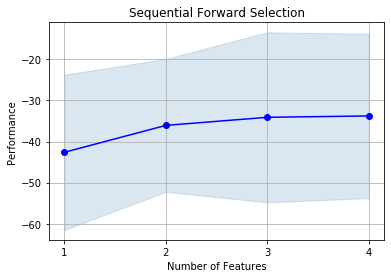

In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(model_sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

After selection, we need to refit model

In [21]:
X.shape

(506, 14)

In [22]:
X_selected = model_sfs.transform(X)
X_selected.shape

(506, 4)

In [23]:
model_3_after_selection = model_3.fit(X_selected, y)

We can use the refitted model to make predictions (in-sample)

In [24]:
model_3_after_selection.predict(X_selected)[:10] 

array([30.79649826, 25.50217444, 31.8247553 , 30.82560766, 30.10971369,
       27.00501549, 24.10571676, 20.94661936, 12.3480768 , 21.38274259])

## Recursive feature elimination with sklearn

[Manual](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

In [25]:
from sklearn.feature_selection import RFE

In [26]:
model_RFE = RFE(model_3, 4)
model_RFE.fit(X, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=4, step=1, verbose=0)

In [27]:
model_RFE.get_support()

array([False, False, False, False,  True,  True,  True, False, False,
       False, False,  True, False, False])

Get the selected X variables:

In [28]:
X.loc[:, model_RFE.get_support()]

,CHAS,NOX,RM,PTRATIO
0,0.0,0.538,6.575,15.3
1,0.0,0.469,6.421,17.8
2,0.0,0.469,7.185,17.8
3,0.0,0.458,6.998,18.7
4,0.0,0.458,7.147,18.7
5,0.0,0.458,6.430,18.7
6,0.0,0.524,6.012,15.2
7,0.0,0.524,6.172,15.2
8,0.0,0.524,5.631,15.2
9,0.0,0.524,6.004,15.2


# Regularization

[Lasso Manual](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)  
[LassoCV Manual](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsCV.html#sklearn.linear_model.LassoLarsCV)


In [29]:
from sklearn.linear_model import Lasso, LassoCV, lars_path

We can set the alpha ($\lambda$ in slides)

In [30]:
model_lasso = Lasso(alpha = 0.1, normalize=True)
model_lasso.fit(X, y)
model_lasso.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  2.95469455, -0.        ,  0.        , -0.        ,
       -0.        , -0.24795837,  0.        , -0.42817439])

In [32]:
model_lasso = Lasso(alpha = 0.01, normalize=True)
model_lasso.fit(X, y)
model_lasso.coef_

array([ 0.00000000e+00, -3.64322759e-02,  1.31396371e-02, -0.00000000e+00,
        2.35347032e+00, -8.55520533e+00,  4.23594765e+00, -0.00000000e+00,
       -7.43441180e-01,  0.00000000e+00, -0.00000000e+00, -8.18516734e-01,
        7.24043623e-03, -5.20681351e-01])

Which variables are selected? 

In [33]:
X.columns[np.abs(model_lasso.coef_) > 0]

Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'], dtype='object')

LassoCV can search for best alpha automatically.

In [34]:
model_lassoCV = LassoCV(cv=5, normalize=True)
model_lassoCV.fit(X, y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [35]:
model_lassoCV.alpha_

0.008002884283707804

We can also visualize the Lasso Path

In [36]:
from scipy import interpolate
from sklearn import preprocessing

different lasso use different optimization

In [37]:
alphas_lasso, coefs_lasso, _ = model_lasso.path(X, y)

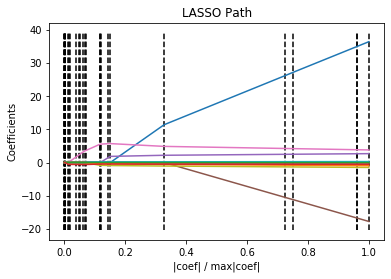

In [38]:
_, _, coefs = lars_path(X.values, y.values.flatten(), method='lasso')

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

# Train-test split 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
X_train.shape

(404, 14)

In [42]:
X_test.shape

(102, 14)

**Important**: Standardizing/Normalizing data is part of the model training process. You shoud fit a standardizer (learning the mean and std from the train set) and use it to transform both the train and test set. See [here](https://scikit-learn.org/stable/modules/preprocessing.html). 

In [43]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [44]:
model_lassoCV = LassoCV(cv=5, normalize=False) # note we don't need to normalize again
model_lassoCV.fit(scaler.transform(X_train), y_train) # note we transform X_train

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

Predict test set and evaluate performance

In [45]:
y_hat_test = model_lassoCV.predict(scaler.transform((X_test))) 
# note we transform X_test using the scaler learned from the train set

In [46]:
from sklearn import metrics

In [47]:
metrics.mean_squared_error(y_true=y_test, y_pred=y_hat_test)

21.49222896460132

# Exercises

In the exercises, you will analyze which factors are associated with the number of likes a Facebook post gets. The dataset is from https://archive.ics.uci.edu/ml/datasets/Facebook+metrics. All posts are from the page of a renowned cosmetics brand.

The dependent variable is `like`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics

In [2]:
fb_like = pd.read_csv('http://fengmai.net/download/data/bia652/dataset_Facebook.csv', sep=";")
# remove unneeded variables
not_needed = ['Page total likes', 'Total Interactions']
fb_like = fb_like.drop(not_needed, axis = 1)

In [3]:
fb_like.head(5)

,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share
0,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0
1,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0
2,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0
3,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0
4,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0


## Exercise 1 - Modeling with categorical Xs

- Use [pd.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to create dummy variables for the following variables: `Type`, `Category`, `Post Month`, `Post Weekday`, `Post Hour`. Make sure that `drop_firt=True` to avoid multicollinearity problem.
- You may want to read [this post](https://stackoverflow.com/questions/24109779/running-get-dummies-on-several-dataframe-columns) to create dummies for multiple columns.
- The origninal columns will be automatically dropped after you create the dummies. 
- You may want to check if any rows have missing variables and drop them accordingly. 
- Create a regression model that uses all the variables (other than like) as independent variables. You'll need to use `statsmodels` and not `sklearn`. Display the OLS Regression Results.  
- No need to split the data to train-test sets for this exercise. 

In [5]:
#### YOUR CODE HERE ####
#read file and use ";" to sepreate into different columns
df_1=pd.read_csv('03_data/dataset_Facebook.csv',sep=';')
df_1.head(5)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [6]:
fb_like.shape

(500, 17)

In [7]:
df_1.shape

(500, 19)

In [8]:
df_1.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [9]:
#get all the names of colunmns
df_1.columns.values

array(['Page total likes', 'Type', 'Category', 'Post Month',
       'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'], dtype=object)

use boxplot to check normailzaiton

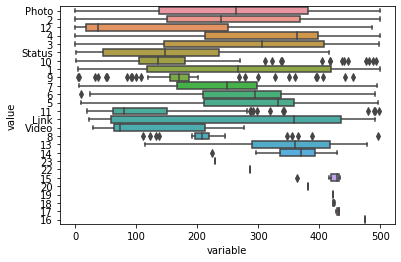

In [10]:
col_name=["Type",'Category', 'Post Month', 'Post Weekday', 'Post Hour']
fb_like_1=pd.DataFrame(fb_like[col] for col in col_name)
#fb_like_1.boxplot()
sns.boxplot(x="variable", y="value", data=pd.melt(fb_like_1))
plt.show()

In [11]:
#using specific column to create dummy variable,except "Type", other variables are in the same magnitudes. Maybe for now, we don't need nomorallization
col_name=['Type','Category', 'Post Month', 'Post Weekday', 'Post Hour']
#If i want to drop multi-columns,i can use "for loop" to cacluate in one line
df_2=pd.get_dummies(data=df_1,columns=[col for col in col_name],drop_first=True)
df_2.head()

,Page total likes,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,...,Post Hour_13,Post Hour_14,Post Hour_15,Post Hour_16,Post Hour_17,Post Hour_18,Post Hour_19,Post Hour_20,Post Hour_22,Post Hour_23
0,139441,0.0,2752,5091,178,109,159,3078,1640,119,...,0,0,0,0,0,0,0,0,0,0
1,139441,0.0,10460,19057,1457,1361,1674,11710,6112,1108,...,0,0,0,0,0,0,0,0,0,0
2,139441,0.0,2413,4373,177,113,154,2812,1503,132,...,0,0,0,0,0,0,0,0,0,0
3,139441,1.0,50128,87991,2211,790,1119,61027,32048,1386,...,0,0,0,0,0,0,0,0,0,0
4,139441,0.0,7244,13594,671,410,580,6228,3200,396,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#drop origial columans, because i didn't find one command to fullfill that requriement
df_3=df_1.drop(['Type','Category', 'Post Month', 'Post Weekday', 'Post Hour'],axis=1)
#merge new dummy df_2 with original df-3(droped) into df_4
df_4=pd.concat([df_2,df_3],axis=1)

In [13]:
#according to the numbers of types, columns increase from 17 to 43
df_4.shape

(500, 71)

In [14]:
df_4.describe()

,Page total likes,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,...,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,...,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,...,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,...,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,...,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,...,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,...,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,...,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,...,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [15]:
df_4=df_4.drop(["Paid","share"],axis=1)

In [16]:
#no columns have NULL value
df_4.isnull().any()

Page total likes                                                       False
Lifetime Post Total Reach                                              False
Lifetime Post Total Impressions                                        False
Lifetime Engaged Users                                                 False
Lifetime Post Consumers                                                False
Lifetime Post Consumptions                                             False
Lifetime Post Impressions by people who have liked your Page           False
Lifetime Post reach by people who like your Page                       False
Lifetime People who have liked your Page and engaged with your post    False
comment                                                                False
like                                                                    True
Total Interactions                                                     False
Type_Photo                                                             False

In [17]:
#There are still some null value in "like", i have to replace them with some real number
df_1["like"].fillna(0,inplace=True)

In [18]:
X=df_4.drop(["like"],axis=1)
y=df_1['like']
X = sm.add_constant(X) 
full_model = sm.OLS(y, X).fit()
full_model.summary()

d:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   like   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8286.
Date:                Mon, 25 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:54:47   Log-Likelihood:                -1869.5
No. Observations:                 500   AIC:                             3849.
Df Residuals:                     445   BIC:                             4081.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  41.8037     32.125      1.301      0.194     -21.333     104.940
Page total likes                                                       -0.0003      0.000     -1.612      0.108      -0.001    6.48e-05
Lifetime Post Total Reach                                            -2.31e-06   5.26e-05     -0.044      0.965      -0.000       0.000
Lifetime Post Total Impressions                                     -1.423e-05   1.87e-05     -0.759      0.448   -5.11e-05    2.26e-05
Lifetime Engaged Users                                                  0.1019      0.007     14.992      0.000       0.089       0.115
Lifetime Post Consumers                                                -0.1032      0.007    -15.338      0.000      -0.116      -0.090
Lifetime Post Consumptions                                              0.0008      0.000      4.312      0.000       0.000       0.001
Lifetime Post Impressions by people who have liked your Page         1.683e-05   2.01e-05      0.837      0.403   -2.27e-05    5.63e-05
Lifetime Post reach by people who like your Page                        0.0002      0.000      1.848      0.065   -1.25e-05       0.000
Lifetime People who have liked your Page and engaged with your post     0.0042      0.001      3.426      0.001       0.002       0.007
comment                                                                -0.4872      0.030    -16.423      0.000      -0.546      -0.429
Total Interactions                                                      0.3752      0.005     68.619      0.000       0.364       0.386
Type_Photo                                                             -2.8571      2.608     -1.096      0.274      -7.982       2.268
Type_Status                                                           -11.9670      3.785     -3.162      0.002     -19.405      -4.528
Type_Video                                                            -12.2284      5.110     -2.393      0.017     -22.271      -2.186
Category_2                                                              1.3364      1.613      0.828      0.408      -1.834       4.507
Category_3                                                              0.5782      1.472      0.393      0.695      -2.316       3.472
Post Month_2                                                            8.2264      4.251      1.935      0.054      -0.128      16.581
Post Month_3                                                           15.9792      6.275      2.546      0.011       3.646      28.312
Post Month_4                                                           19.1121      9.472  

## Exercise 2 - Use AIC/BIC for model selection

- Read the [example here](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py) and the [manual here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsIC.html#sklearn.linear_model.LassoLarsIC). You may want to create a separate notebook to run the example.
- Use `LassoLarsIC` to select the best model using the **`bic`** criterion. 
- No need to split the data to train-test sets for this exercise. 
- Which X variables are selected by the `LassoLarsIC` method? Answer using variable names. 

In [19]:
#### YOUR CODE HERE ####
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

In [20]:
# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

#diabetes = datasets.load_diabetes()
#X = diabetes.data
#y = diabetes.target

#rng = np.random.RandomState(42)
#X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

In [21]:
X.describe()

,const,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,...,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,Total Interactions
count,500.0,500.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,...,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000
mean,1.0,123194.176000,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,...,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,212.120000
std,0.0,16272.813214,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,...,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,380.233118
min,1.0,81370.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,...,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000
25%,1.0,112676.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,...,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,71.000000
50%,1.0,129600.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,...,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,123.500000
75%,1.0,136393.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,...,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,228.500000
max,1.0,139441.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,...,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,6334.000000


In [22]:
# normalize data as done by Lars to allow for comparison
X_normal = X/(np.sqrt(np.sum(X ** 2, axis=0)))

In [23]:
X_normal.describe()

,const,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,...,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,Total Interactions
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.472136e-02,0.044337,0.023345,0.016090,0.030548,0.030027,0.025843,0.012086,0.029123,0.031568,...,0.023345,0.016090,0.030548,0.030027,0.025843,0.012086,0.029123,0.031568,0.014909,0.021804
std,1.944836e-16,0.005857,0.038183,0.041768,0.032695,0.033175,0.036535,0.043100,0.033973,0.031709,...,0.038183,0.041768,0.032695,0.033175,0.036535,0.043100,0.033973,0.031709,0.042205,0.039085
min,4.472136e-02,0.029285,0.000400,0.000310,0.000299,0.000338,0.000164,0.000409,0.001044,0.000466,...,0.000400,0.000310,0.000299,0.000338,0.000164,0.000409,0.001044,0.000466,0.000000,0.000000
25%,4.472136e-02,0.040552,0.005566,0.003097,0.013069,0.012499,0.009300,0.002862,0.009647,0.015060,...,0.005566,0.003097,0.013069,0.012499,0.009300,0.002862,0.009647,0.015060,0.001993,0.007298
50%,4.472136e-02,0.046642,0.008867,0.004922,0.020762,0.020732,0.015541,0.004509,0.015111,0.021322,...,0.008867,0.004922,0.020762,0.020732,0.015541,0.004509,0.015111,0.021322,0.005978,0.012695
75%,4.472136e-02,0.049087,0.022110,0.012011,0.035250,0.035919,0.026717,0.010712,0.035330,0.033962,...,0.022110,0.012011,0.035250,0.035919,0.026717,0.010712,0.035330,0.033962,0.013948,0.023488
max,4.472136e-02,0.050184,0.303036,0.603812,0.380116,0.425838,0.361205,0.798582,0.227557,0.226465,...,0.303036,0.603812,0.380116,0.425838,0.361205,0.798582,0.227557,0.226465,0.741252,0.651084


In [24]:
# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.270e-01, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=5.799e-02, with an active set of 9 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=5.799e-02, with an active set of 9 regressors, and the smallest cholesky pivot

In [27]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.270e-01, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=5.799e-02, with an active set of 9 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=5.799e-02, with an active set of 9 regressors, and the smallest cholesky pivot

In [25]:
def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

Text(0.5, 1.0, 'Information-criterion for model selection (training time 0.028s)')

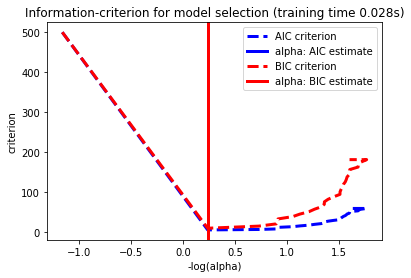

In [28]:
plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

In [29]:
y_predict=LassoLarsIC(X)

## Exercise 3 - Compare out-of-sample perormance

- Split the data to 90% train and 10% test set. 
- Train the `LassoLarsIC` model, a full model (using all X variables), and a `model_lassoCV` model on the train set. 
- Remember to train a scaler using train set only, and transform both X_train and X_test. 
- Compare their test-set performance using MSE. 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [34]:
#### YOUR CODE HERE ####
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1)

In [35]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [37]:
model_lassoLarsIC = LassoLarsIC(criterion='aic', normalize=False) # note we don't need to normalize again
model_lassoLarsIC.fit(scaler.transform(X_train), y_train) # note we transform X_train

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.652e+00, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=1.462e+00, with an active set of 10 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 19 iterations, i.e. alpha=8.087e-01, with an active set of 19 regressors, and the smallest cholesky p

LassoLarsIC(copy_X=True, criterion='aic', eps=2.220446049250313e-16,
            fit_intercept=True, max_iter=500, normalize=False, positive=False,
            precompute='auto', verbose=False)

In [42]:
y_predict=model_lassoLarsIC.predict(scaler.transform(X_test))

In [43]:
metrics.mean_squared_error(y_true=y_test, y_pred=y_predict)

1998.3634373334996

<br>

In [39]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [43]:
model_lassoCV = LassoCV(cv=5, normalize=True)
model_lassoCV.fit(scaler.transform(X_train), y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [44]:
y_predict = model_lassoCV.predict(scaler.transform((X_test))) 

In [47]:
metrics.mean_squared_error(y_true=y_test, y_pred=y_predict)

53.35231309525756